<a href="https://colab.research.google.com/github/DanielAlonsoCuriel/deeplearning/blob/main/AA_PRACTICA1_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AA_PRACTICA1_GRUPO_4

Daniel Alonso

Javier Arteaga

Marina Garrido

Elena González

### Importar librerías

In [121]:
%tensorflow_version 2.x
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
print(tensorflow.keras.__version__)
print('GPU Available:', tensorflow.config.list_physical_devices('GPU'))
print(tensorflow.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [122]:
from keras.datasets import fashion_mnist 
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras.layers.core import Flatten
from keras import metrics
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

## Cargar los datos

Cargar los datos de Fashion MNIST en Keras. 

Hay 60K imágenes para entrenar la red y 10K para evaluar la precisión de clasificación.


In [123]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
print('Imágenes de entrenamiento:', train_data.shape)
print('Imágenes de test:', test_data.shape)

Imágenes de entrenamiento: (60000, 28, 28)
Imágenes de test: (10000, 28, 28)


Los datos tienen forma de 60K y 10K matrices (imágenes), respectivamente, de 28 filas x 28 columnas = 784 (píxeles).

Se modifica la forma de los datos a 60K y 10K matrices, respectivamente, de matrices 28x28. Además, se normalizan los datos para facilitar que converja el entrenamiento, ya que el resultado se obtiene en porcentaje de probabilidad (valores entre 0 y 1).

In [124]:
train_data = train_data.reshape((60000, 28 * 28))
train_data = train_data.astype('float32') / 255
test_data = test_data.reshape((10000, 28 * 28))
test_data = test_data.astype('float32') / 255
print('Imágenes de entrenamiento:', train_data.shape)
print('Imágenes de test:', test_data.shape)

Imágenes de entrenamiento: (60000, 784)
Imágenes de test: (10000, 784)


Se codifican las etiquetas de las imágenes de forma que lo pueda procesar la red. Cada etiqueta se convierte en un vector de 10 elementos (número de categorías) en el que el único valor distinto de ```0``` es un ```1``` en la posición de la categoría a la que corresponde.

In [125]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Se seleccionan 10K imágenes de entrenamiento como datos de validación para poder estudiar la precisión de la red frente a nuevos datos.

In [126]:
# Datos de validación
val_data = train_data[:10000]
val_labels = train_labels[:10000]

# Datos de entrenamiento
train_val_data = train_data[10000:]
train_val_labels = train_labels[10000:]


## Caso 1

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [127]:
model = models.Sequential()
model.add(layers.Dense(10, activation ='relu', name = 'Capa1', input_shape = (28*28,)))
model.add(layers.Dense(10, name = 'CapaSalida1', activation = 'softmax'))

model.add(Flatten())
model.output_shape


(None, 10)

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [128]:
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida1 (Dense)         (None, 10)                110       
                                                                 
 flatten_4 (Flatten)         (None, 10)                0         
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [129]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [130]:
history = model.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 1.6073 - accuracy: 0.4796 - val_loss: 1.1146 - val_accuracy: 0.6638
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 0.9384 - accuracy: 0.7016 - val_loss: 0.8256 - val_accuracy: 0.7311
Epoch 3/5
391/391 [==============================] - 1s 4ms/step - loss: 0.7616 - accuracy: 0.7443 - val_loss: 0.7208 - val_accuracy: 0.7594
Epoch 4/5
391/391 [==============================] - 1s 4ms/step - loss: 0.6850 - accuracy: 0.7681 - val_loss: 0.6667 - val_accuracy: 0.7788
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.6389 - accuracy: 0.7833 - val_loss: 0.6270 - val_accuracy: 0.7935


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [131]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6385 - accuracy: 0.7831


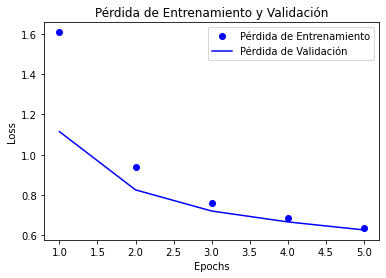

In [132]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [133]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 2ms/step
Valores de predicción del modelo
Matriz de confusión


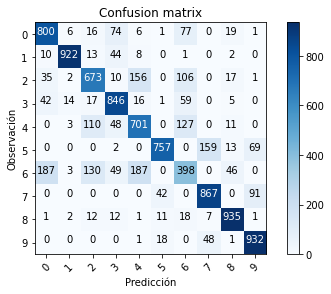

In [134]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

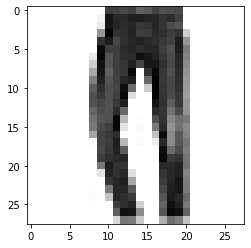

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [135]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [136]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 2ms/step
Predicción del elemento 6: clase 1
[8.0509707e-03 9.7472477e-01 2.0519181e-04 8.7410100e-03 6.1334926e-03
 1.4791298e-06 2.0759560e-03 1.6858114e-07 7.7045506e-06 5.9197104e-05]
Suma de las predicciones del elemento 6: 0.9999999


In [137]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

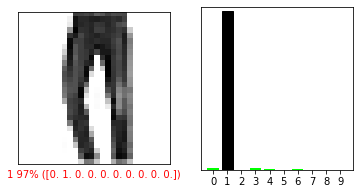

In [138]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 2

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [139]:
model = models.Sequential()
model.add(layers.Dense(10, activation ='relu', name = 'Capa2', input_shape = (28*28,)))
model.add(layers.Dense(10, name = 'CapaSalida2', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [140]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa2 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida2 (Dense)         (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [141]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [142]:
history = model.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 0.8769 - accuracy: 0.7118 - val_loss: 0.6236 - val_accuracy: 0.7902
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5531 - accuracy: 0.8150 - val_loss: 0.5243 - val_accuracy: 0.8260
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4987 - accuracy: 0.8293 - val_loss: 0.5003 - val_accuracy: 0.8306
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4738 - accuracy: 0.8368 - val_loss: 0.4891 - val_accuracy: 0.8296
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4564 - accuracy: 0.8430 - val_loss: 0.4562 - val_accuracy: 0.8432


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [143]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.8319


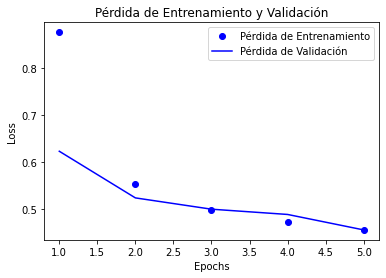

In [144]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [145]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 2ms/step
Valores de predicción del modelo
Matriz de confusión


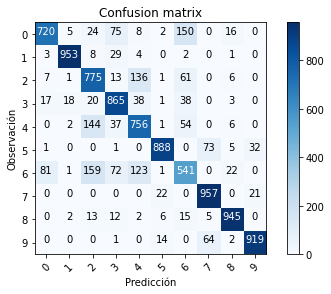

In [146]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

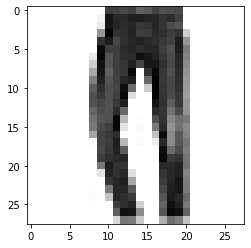

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [147]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [148]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 2ms/step
Predicción del elemento 6: clase 1
[1.3155725e-03 9.9490565e-01 5.7346141e-04 1.0424776e-03 2.1083322e-03
 9.5856434e-10 5.2422540e-05 6.4088939e-09 1.9665906e-06 1.8080993e-11]
Suma de las predicciones del elemento 6: 0.99999994


In [149]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

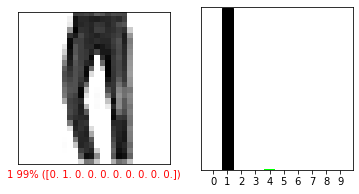

In [150]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 2.5

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [151]:
model = models.Sequential()
model.add(layers.Dense(10, activation ='relu', name = 'Capa2', input_shape = (28*28,)))
model.add(layers.Dense(10, name = 'CapaSalida2', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [152]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa2 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida2 (Dense)         (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [153]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [154]:
history = model.fit(train_val_data, train_val_labels,
                    epochs = 25,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/25
391/391 [==============================] - 2s 4ms/step - loss: 0.8955 - accuracy: 0.7049 - val_loss: 0.5891 - val_accuracy: 0.7997
Epoch 2/25
391/391 [==============================] - 2s 4ms/step - loss: 0.5362 - accuracy: 0.8151 - val_loss: 0.5050 - val_accuracy: 0.8201
Epoch 3/25
391/391 [==============================] - 1s 3ms/step - loss: 0.4848 - accuracy: 0.8294 - val_loss: 0.4901 - val_accuracy: 0.8237
Epoch 4/25
391/391 [==============================] - 1s 4ms/step - loss: 0.4591 - accuracy: 0.8382 - val_loss: 0.4535 - val_accuracy: 0.8384
Epoch 5/25
391/391 [==============================] - 1s 3ms/step - loss: 0.4443 - accuracy: 0.8433 - val_loss: 0.4677 - val_accuracy: 0.8317
Epoch 6/25
391/391 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8482 - val_loss: 0.4344 - val_accuracy: 0.8479
Epoch 7/25
391/391 [==============================] - 2s 4ms/step - loss: 0.4236 - accuracy: 0.8511 - val_loss: 0.4436 - val_accuracy: 0.8430
Epoch 

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [155]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4526 - accuracy: 0.8420


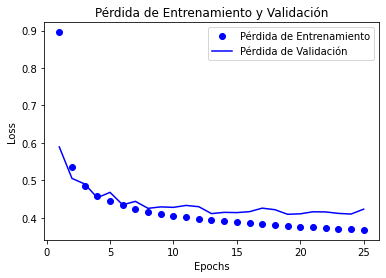

In [156]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [157]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 2ms/step
Valores de predicción del modelo
Matriz de confusión


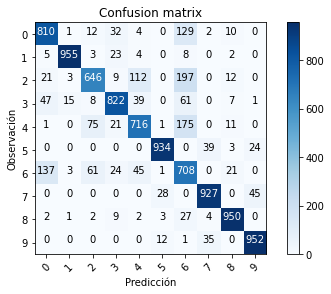

In [158]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

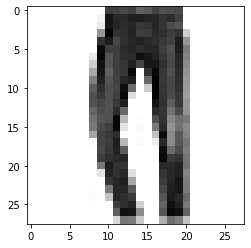

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [159]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [160]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 0s 2ms/step
Predicción del elemento 6: clase 1
[2.8915072e-03 9.9505591e-01 3.6289386e-04 8.9751462e-05 1.5076387e-03
 1.5689715e-13 9.1513444e-05 1.9067223e-13 5.4996815e-07 9.3912387e-12]
Suma de las predicciones del elemento 6: 0.9999997


In [161]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

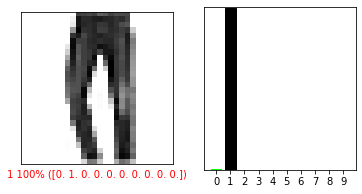

In [162]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 3

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [163]:
model = models.Sequential()
model.add(layers.Dense(10, activation ='sigmoid', name = 'Capa3', input_shape = (28*28,)))
model.add(layers.Dense(10, name = 'CapaSalida3', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [164]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa3 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida3 (Dense)         (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [165]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [166]:
history = model.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 2.1735 - accuracy: 0.2812 - val_loss: 2.0386 - val_accuracy: 0.4814
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 1.9287 - accuracy: 0.5619 - val_loss: 1.8244 - val_accuracy: 0.6121
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 1.7350 - accuracy: 0.6290 - val_loss: 1.6474 - val_accuracy: 0.6434
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 1.5740 - accuracy: 0.6612 - val_loss: 1.5005 - val_accuracy: 0.6775
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 1.4404 - accuracy: 0.6939 - val_loss: 1.3793 - val_accuracy: 0.7009


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [167]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.3877 - accuracy: 0.6951


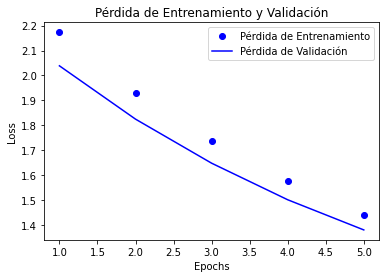

In [168]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [169]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 2ms/step
Valores de predicción del modelo
Matriz de confusión


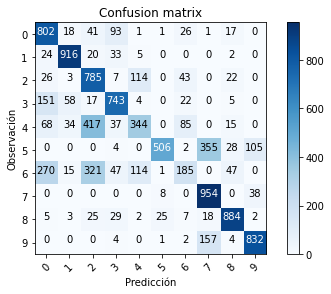

In [170]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

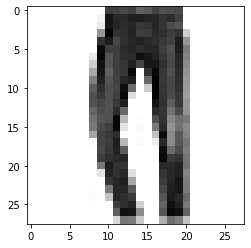

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [171]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [172]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 0s 1ms/step
Predicción del elemento 6: clase 1
[0.14926784 0.3736427  0.05688441 0.12992103 0.09524407 0.03116809
 0.05212465 0.03835043 0.02691319 0.04648353]
Suma de las predicciones del elemento 6: 0.9999999


In [173]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

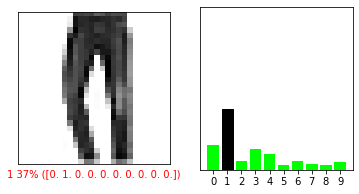

In [174]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 3.5

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [206]:

model2 = models.Sequential()
model2.add(layers.Flatten(input_shape=(28,28)))
#Capa 3b (sparse_categorical_crossentropy)
model2.add(layers.Dense(10, activation='sigmoid', name="Capa3b",input_shape=(28*28,)))

#Capa final
model2.add(layers.Dense(10, name="CapaSalida",activation='softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [207]:
model2.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 Capa3b (Dense)              (None, 10)                7850      
                                                                 
 CapaSalida (Dense)          (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

Probamos que pasaría si cambiamos el optimizador por 'adam' y la funcion de perdida por 'sparse_categorical_crossentropy'. El optimizador adam es una combinacion de AdaGrad y RMSProp ya que además de RMSProp, cada factor de entrenamiento también se ve afectado por el momentum del gradiente. (https://respuestasrapidas.com.mx/que-es-optimizador-adam/) La función de pérdida sparse_categorical_crossentropy, es una medida de distancia entre probabilidades al igual que categorical_crossentropy pero este caso es usado unicamente para numeros enteros.(https://ignaciogavilan.com/catalogo-de-componentes-de-redes-neuronales-iii-funciones-de-perdida/)

In [208]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [209]:
model2.fit(train_data, train_labels, epochs=5, batch_size=128)

Epoch 1/5


ValueError: ignored

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [210]:
test_loss, test_acc = model2.evaluate(test_data, test_labels)

ValueError: ignored

In [211]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.34947875142097473
test_acc: 0.875


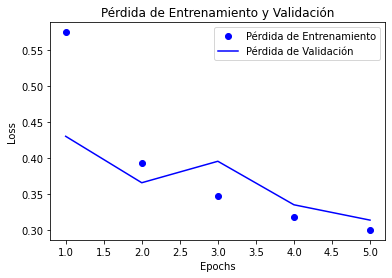

In [212]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [213]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [214]:
Y_pred = model2.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

ValueError: ignored

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

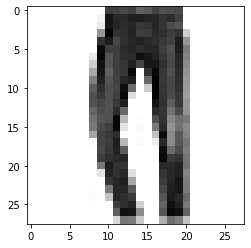

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [215]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [216]:
predictions = model2.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

ValueError: ignored

In [217]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

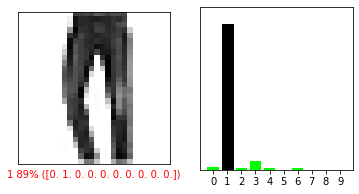

In [218]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 4

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [179]:
model = models.Sequential()
model.add(layers.Dense(10, activation ='sigmoid', name = 'Capa4', input_shape = (28*28,)))
model.add(layers.Dense(10, name = 'CapaSalida4', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [180]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa4 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida4 (Dense)         (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [181]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [182]:
history = model.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 1.4953 - accuracy: 0.5772 - val_loss: 1.1569 - val_accuracy: 0.7428
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 0.9731 - accuracy: 0.7761 - val_loss: 0.8356 - val_accuracy: 0.7946
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 0.7377 - accuracy: 0.8078 - val_loss: 0.6681 - val_accuracy: 0.8154
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.6131 - accuracy: 0.8220 - val_loss: 0.5785 - val_accuracy: 0.8248
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5456 - accuracy: 0.8301 - val_loss: 0.5301 - val_accuracy: 0.8287


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [183]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5529 - accuracy: 0.8175


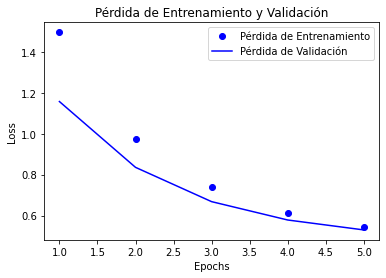

In [184]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [185]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 2ms/step
Valores de predicción del modelo
Matriz de confusión


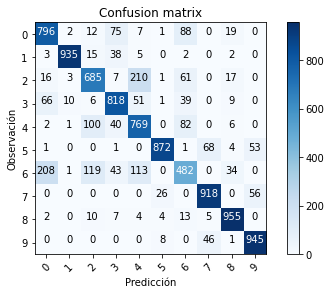

In [186]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

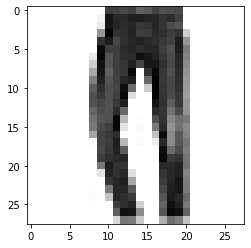

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [187]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [188]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 2ms/step
Predicción del elemento 6: clase 1
[1.9339224e-02 8.9369553e-01 9.1692014e-03 5.6196511e-02 9.6247178e-03
 3.9619921e-05 1.1548604e-02 4.0754432e-05 3.1883246e-04 2.6996287e-05]
Suma de las predicciones del elemento 6: 1.0


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 5

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 512 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [189]:
model = models.Sequential()
model.add(layers.Dense(512, activation ='relu', name = 'Capa5', input_shape = (28*28,)))
model.add(layers.Dense(10, name = 'CapaSalida5', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 401920 = 784 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

En el caso de la segunda capa: 262656 = 512 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

In [190]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa5 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida5 (Dense)         (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [191]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [192]:
history = model.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 4s 10ms/step - loss: 1.0648 - accuracy: 0.6823 - val_loss: 0.7521 - val_accuracy: 0.7667
Epoch 2/5
391/391 [==============================] - 4s 10ms/step - loss: 0.6819 - accuracy: 0.7845 - val_loss: 0.6337 - val_accuracy: 0.7982
Epoch 3/5
391/391 [==============================] - 4s 9ms/step - loss: 0.6008 - accuracy: 0.8078 - val_loss: 0.5847 - val_accuracy: 0.8111
Epoch 4/5
391/391 [==============================] - 4s 9ms/step - loss: 0.5577 - accuracy: 0.8187 - val_loss: 0.5496 - val_accuracy: 0.8209
Epoch 5/5
391/391 [==============================] - 4s 10ms/step - loss: 0.5289 - accuracy: 0.8249 - val_loss: 0.5235 - val_accuracy: 0.8311


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [193]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5443 - accuracy: 0.8167


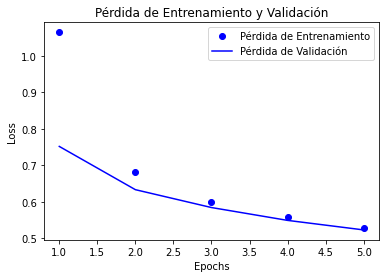

In [194]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [195]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 6

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 512 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [196]:
model = models.Sequential()
model.add(layers.Dense(512, activation ='relu', name = 'Capa6', input_shape = (28*28,)))
model.add(layers.Dense(10, name = 'CapaSalida6', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 401920 = 784 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

En el caso de la segunda capa: 262656 = 512 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

In [197]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa6 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida6 (Dense)         (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [198]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [199]:
history = model.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 6s 13ms/step - loss: 0.5745 - accuracy: 0.7947 - val_loss: 0.4304 - val_accuracy: 0.8417
Epoch 2/5
391/391 [==============================] - 5s 13ms/step - loss: 0.3935 - accuracy: 0.8565 - val_loss: 0.3661 - val_accuracy: 0.8711
Epoch 3/5
391/391 [==============================] - 5s 12ms/step - loss: 0.3471 - accuracy: 0.8725 - val_loss: 0.3958 - val_accuracy: 0.8526
Epoch 4/5
391/391 [==============================] - 5s 12ms/step - loss: 0.3187 - accuracy: 0.8823 - val_loss: 0.3355 - val_accuracy: 0.8789
Epoch 5/5
391/391 [==============================] - 5s 12ms/step - loss: 0.3007 - accuracy: 0.8889 - val_loss: 0.3143 - val_accuracy: 0.8860


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [200]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.8750


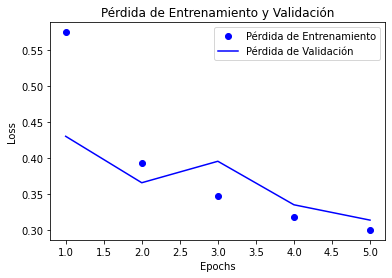

In [201]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 7

### Crear la red de neuronas

Se crea la red neuronal con una capa de 
entrada con 512 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation ='sigmoid', name = 'Capa7', input_shape = (28*28,)))
model.add(layers.Dense(10, name = 'CapaSalida7', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 401920 = 784 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

En el caso de la segunda capa: 262656 = 512 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

In [ ]:
model.summary()

Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 7.5

### Crear la red de neuronas

Se crea la red neuronal con una capa de 
entrada con 512 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation ='sigmoid', name = 'Capa7', input_shape = (28*28,)))
model.add(layers.Dense(10, name = 'CapaSalida7', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 401920 = 784 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

En el caso de la segunda capa: 262656 = 512 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

In [ ]:
model.summary()

Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model.fit(train_val_data, train_val_labels,
                    epochs = 25,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 8

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 512 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [219]:
model = models.Sequential()
model.add(layers.Dense(512, activation ='sigmoid', name = 'Capa8', input_shape = (28*28,)))
model.add(layers.Dense(10, name = 'CapaSalida8', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 401920 = 784 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

En el caso de la segunda capa: 262656 = 512 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

In [220]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa8 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida8 (Dense)         (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [221]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [222]:
history = model.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 6s 14ms/step - loss: 0.6219 - accuracy: 0.7822 - val_loss: 0.4918 - val_accuracy: 0.8137
Epoch 2/5
391/391 [==============================] - 6s 14ms/step - loss: 0.4438 - accuracy: 0.8379 - val_loss: 0.4181 - val_accuracy: 0.8480
Epoch 3/5
391/391 [==============================] - 5s 13ms/step - loss: 0.4018 - accuracy: 0.8538 - val_loss: 0.3813 - val_accuracy: 0.8630
Epoch 4/5
391/391 [==============================] - 6s 15ms/step - loss: 0.3740 - accuracy: 0.8646 - val_loss: 0.3822 - val_accuracy: 0.8619
Epoch 5/5
391/391 [==============================] - 5s 13ms/step - loss: 0.3525 - accuracy: 0.8697 - val_loss: 0.3579 - val_accuracy: 0.8692


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [223]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3892 - accuracy: 0.8627


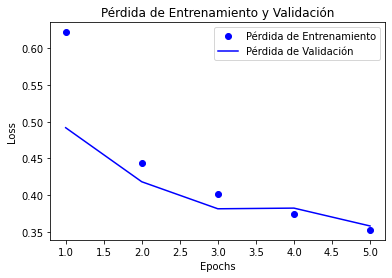

In [224]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [225]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step
Valores de predicción del modelo
Matriz de confusión


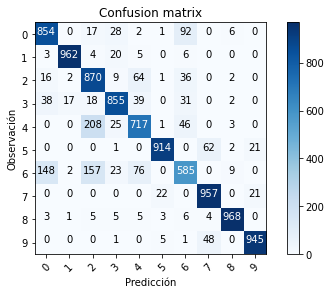

In [226]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

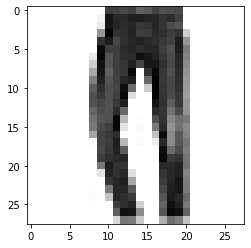

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [227]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [228]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 3ms/step
Predicción del elemento 6: clase 1
[1.5362770e-03 9.9780488e-01 1.0462460e-04 1.5638636e-04 3.4848420e-04
 4.7633817e-09 4.7062622e-05 6.7415959e-07 1.6573485e-06 3.9321164e-09]
Suma de las predicciones del elemento 6: 1.0


In [229]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

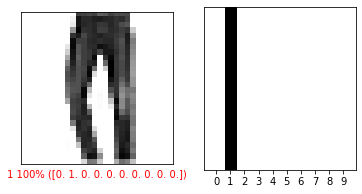

In [230]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()